In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
mappings= {'BRK.B': 'BRK-B'}
with create_app().app_context():
    provided = ['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV']
    quote = Quote([b.symbol if b.symbol not in mappings else mappings[b.symbol]
                   for b in Instrument.find_stocks(100)] + provided, 120)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-11 to 2019-06-11'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 10) & (stat['21-mean'] > 1)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
MUB,63,1.043693,0.372083,2.338035,0.409122
SHOP,63,14.881399,8.650195,1.700268,6.171438
BXMT,63,2.245570,1.224939,1.691366,3.151201
ZNGA,63,7.007418,4.253413,1.606631,4.700161
PYPL,63,5.077070,3.407039,1.439174,7.332929
V,63,3.933649,2.654811,1.416259,4.317938
SPLV,63,1.810029,1.193178,1.371362,1.971361
ENPH,63,24.583476,18.093032,1.349123,6.875388
SBUX,63,3.618674,2.696879,1.277374,4.600183


In [8]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 8, provided, cr=4)

['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'ZNGA', 'PYPL'] 36.34573744154567 11.680078354744134 7.691007166788836 -18.0655831442197
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'ZNGA', 'ENPH'] 34.095443053802256 11.117869145625354 7.5994991155729625 -17.975532644272125
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'ZNGA', 'SBUX'] 32.07916143523903 10.709621786073024 7.144458106625118 -17.903783815678178
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'ZNGA', 'NTDOY'] 24.982077698418973 8.78898273864858 7.701641470676925 -17.87549472685227
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'ZNGA', 'DIS'] 22.694533132068496 8.120486259204968 7.450836800413525 -17.238248705164903
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'ENPH', 'DIS'] 21.398713794145273 7.62339296798994 7.885882208056797 -16.980740285871285
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'SHOP', 'NTDOY', 'DIS'] 19.81869741677787 7.177843805517133 7.988024563160761 -16.880702368451427
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 

['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ENPH', 'NTDOY', 'DIS']

In [7]:
quote.setup_mask([*stat.index, *provided])
quote.least_correlated_portfolio(21, 8, provided + ['ZNGA', 'NTDOY'], cr=4)

['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'SHOP'] 24.982077698418983 8.788982738648581 7.701641470676925 -17.875494726852267
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'ENPH'] 24.37242168830462 8.513585003872633 7.842431502408334 -17.524349829594243
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'WMT'] 22.424298631717946 7.96218045819832 7.396902708057975 -16.821325909133307
['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'DIS'] 19.350669830365973 7.110991633401024 7.693769187248899 -16.78706589048702


['MUB', 'PGX', 'BXMT', 'VNQ', 'SPLV', 'ZNGA', 'NTDOY', 'DIS']

In [9]:
quote.setup_mask(['NTDOY', 'DIS', 'ZNGA'])
quote.find_optimal_ratio(21, 7)

     fun: 12.517702020468224
     jac: array([25.02689207, 25.05059624, 25.03812671])
 message: 'Optimization terminated successfully.'
    nfev: 15
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.26107749, 0.01691037, 0.72201214])


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'NTDOY': 0.26107749400547864,
  'DIS': 0.016910368351487588,
  'ZNGA': 0.7220121376430337},
 7.4871,
 3.538)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,63.0,7.423712,3.520258,0.904993,4.598092,7.098905,9.653011,16.477487,2.059498,4.656612
ZNGA,63.0,7.007418,4.253413,-1.129942,4.301686,6.060608,10.351154,17.904763,1.606631,4.700161
NTDOY,63.0,8.892296,6.979945,-2.404122,3.294994,6.947766,12.424079,27.448683,1.249085,7.386100
DIS,63.0,6.272083,9.967216,-6.472884,-1.459857,2.200019,14.845567,26.877040,0.611839,6.132077


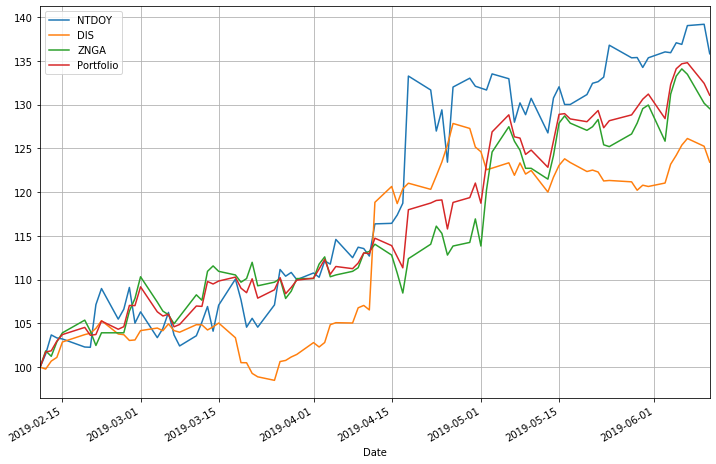

In [10]:
quote.graph(21, {'NTDOY': 0.261, 'ZNGA': 0.722, 'DIS': 0.017})